# 취합된 데이터 파일 확인

In [425]:
# 피클 import
import pickle

In [426]:
# pickle 주소위치 확인!! total_df에 저장
with open ("./dacon_total_df_240504_00.pkl", "rb") as file:
    total_df = pickle.load(file)

In [427]:
# pd.set_option('display.max_columns', None)
# 필요없는 코드

In [428]:
# 값 확인
total_df.head(1)

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,...,Distance,time_diff_purchase_carrier,time_diff_purchase_customer,time_diff_carrier_customer,time_diff_customer_delivery,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,YearMonth
0,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.0,...,1638.82195,4 days 19:14:35,11 days 07:04:11,6 days 11:49:36,51 days 09:24:00,414875.0,975851.0,560976.0,4440240.0,201710


In [429]:
# tmp = total_df.groupby(['Customer_unique_id'])[['order_count', 'Freight_value', 'Price']].sum()
# 필요없는코드

In [430]:
# tmp.head()
# 필요없는코드

In [431]:
import pandas as pd

In [432]:
total_df['Order_purchase_timestamp'] = pd.to_datetime(total_df['Order_purchase_timestamp'])
# Order_purchase_timestamp 데이트타입변경

In [433]:
# total_df.head(1)
# 값 확인

In [434]:
# 각 고객별 최근 주문 일시를 구합니다.
max_order_timestamps = total_df.groupby('Customer_unique_id')['Order_purchase_timestamp'].transform('max')
# latest_order_timestamp 열에 각 고객별 최근 주문 일시를 할당합니다.
total_df['latest_order_timestamp'] = max_order_timestamps

In [435]:
# 각 고객별 첫 주문 일시를 구합니다.
min_order_timestamps = total_df.groupby('Customer_unique_id')['Order_purchase_timestamp'].transform('min')
# latest_order_timestamp 열에 각 고객별 첫 주문 일시를 할당합니다.
total_df['first_order_timestamp'] = min_order_timestamps

In [436]:
# total_df[total_df.latest_order_timestamp!=total_df.first_order_timestamp]
# 값 확인용

In [437]:
# '재구매여부' 열 추가
# order_count컬럼에 대하여 이 값이 2보다 크면 재구매여부에는 y 아니면 n을 저장
total_df['재구매여부'] = total_df['order_count'].apply(lambda x: 'Y' if x >= 2 else 'N')

In [438]:
# total_df["재구매여부"]
# 값 확인

In [439]:
# '구매간격' 열 추가
# latest_order_timestamp  first_order_timestamp 컬럼 데이트타입 변경
total_df['latest_order_timestamp'] = pd.to_datetime(total_df['latest_order_timestamp'])
total_df['first_order_timestamp'] = pd.to_datetime(total_df['first_order_timestamp'])

# 두 값의 차이를 days로 변경
total_df['구매간격'] = (total_df['latest_order_timestamp'] - total_df['first_order_timestamp']).dt.days

In [440]:
# total_df["구매간격"].unique()
# 값 출력

In [441]:
# total_df.head(1)
# 테스트용

In [442]:
# order_count는 customer_unique_id별 order_count를 의미한다
#

In [443]:
# '구매주기' 열 추가
# 만약 order_count의 값이 1이거나 구매간격이 0이라면 => 한번만 샀거나 그날 산것이므로 구매주기에 0을 저장
# 그게 아닐시 구매간격에서 order_count에서 1뺀거를 나눈것이 구매주기 
total_df['구매주기'] = total_df.apply\
(lambda row: 0 if (row['order_count'] - 1 == 0) or (row['구매간격'] == 0) else row['구매간격'] / (row['order_count'] - 1), axis=1)

In [444]:
# total_df[total_df.구매주기==0.500000]
# 값 확인 

In [445]:
# total_df.구매주기.value_counts()
# 값 확인

In [446]:
total_df[total_df['구매주기'] > 0]
# 값확인

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,...,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,YearMonth,latest_order_timestamp,first_order_timestamp,재구매여부,구매간격,구매주기
491,ORDER_03520,PRODUCT_23978,SELLER_1849,2018,1,REVIEW_38126,1,2018-01-31,2018-01-31 12:17:41,9.9,...,77184.0,610891.0,533707.0,2450823.0,201801,2018-01-23 13:31:26,2018-01-21 06:58:31,Y,2,0.5
750,ORDER_07689,PRODUCT_15510,SELLER_0567,2018,3,REVIEW_28047,4,2018-04-07,2018-04-09 22:01:06,29.0,...,407484.0,653992.0,246508.0,988271.0,201803,2018-05-22 23:38:44,2018-03-29 23:48:57,Y,53,53.0
856,ORDER_09816,PRODUCT_24900,SELLER_1678,2018,3,REVIEW_78421,5,2018-04-08,2018-04-08 21:03:08,24.9,...,335592.0,684715.0,349123.0,1513605.0,201803,2019-01-12 16:26:06,2018-03-30 13:21:20,Y,288,144.0
1424,ORDER_19702,PRODUCT_29235,SELLER_0671,2018,3,REVIEW_53691,5,2018-03-15,2018-03-16 10:55:04,98.3,...,518856.0,1028968.0,510112.0,1421257.0,201803,2018-05-09 15:29:51,2018-03-02 15:22:55,Y,68,68.0
2025,ORDER_30725,PRODUCT_23978,SELLER_1849,2018,1,REVIEW_48137,1,2018-01-31,2018-01-31 12:16:03,9.9,...,268671.0,802754.0,534083.0,4269735.0,201801,2018-01-23 13:31:26,2018-01-21 06:58:31,Y,2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88286,ORDER_48690,PRODUCT_00774,SELLER_2669,2019,7,REVIEW_03824,5,2019-07-24,2019-07-24 20:25:55,26.0,...,50648.0,493838.0,443190.0,1494750.0,201907,2019-07-17 23:36:52,2019-05-02 01:27:50,Y,76,76.0
88563,ORDER_54123,PRODUCT_03512,SELLER_2199,2019,7,REVIEW_81940,2,2019-07-15,2019-07-15 15:12:14,290.0,...,553255.0,774405.0,221150.0,950110.0,201907,2019-07-20 04:05:49,2019-07-05 00:58:05,Y,15,5.0
88564,ORDER_54123,PRODUCT_05125,SELLER_2199,2019,7,REVIEW_81940,2,2019-07-15,2019-07-15 15:12:14,320.0,...,553255.0,774405.0,221150.0,950110.0,201907,2019-07-20 04:05:49,2019-07-05 00:58:05,Y,15,15.0
89226,ORDER_67028,PRODUCT_07667,SELLER_0775,2019,7,REVIEW_29228,5,2019-07-24,2019-07-27 09:46:18,34.0,...,21662.0,482260.0,460598.0,786022.0,201907,2019-07-18 07:41:58,2018-10-26 14:42:55,Y,264,52.8


In [447]:
total_df[total_df['Customer_unique_id'] == 'CUSTOMER_Unique_85216']
#값 확인

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,...,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,YearMonth,latest_order_timestamp,first_order_timestamp,재구매여부,구매간격,구매주기
64960,ORDER_84288,PRODUCT_27785,SELLER_1049,2019,1,REVIEW_67953,5,2019-02-08,2019-02-10 20:07:29,29.9,...,241585.0,1264843.0,1023258.0,1232225.0,201901,2019-01-24 02:22:12,2019-01-24 02:22:12,Y,0,0.0


In [448]:
total_df[total_df['order_count'] >= 2].sort_values(by='Customer_unique_id')
# 값확인

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,...,time_diff_purchase_carrier_second,time_diff_purchase_customer_second,time_diff_carrier_customer_second,time_diff_customer_delivery_second,YearMonth,latest_order_timestamp,first_order_timestamp,재구매여부,구매간격,구매주기
37105,ORDER_50057,PRODUCT_04082,SELLER_0417,2018,10,REVIEW_59807,1,2018-10-26,2018-10-27 09:19:26,59.90,...,124061.0,904930.0,780869.0,955742.0,201810,2018-10-15 11:08:48,2018-10-15 11:08:48,Y,0,0.0
67776,ORDER_08495,PRODUCT_14758,SELLER_1822,2019,4,REVIEW_22414,2,2019-04-27,2019-04-27 20:35:22,11.99,...,124175.0,698909.0,574734.0,1236802.0,201904,2019-04-18 14:18:09,2019-04-18 14:18:09,Y,0,0.0
19271,ORDER_33608,PRODUCT_27916,SELLER_1192,2018,7,REVIEW_22368,5,2018-07-22,2018-07-24 11:19:02,99.97,...,36342.0,901776.0,865434.0,1137218.0,201807,2018-07-11 09:36:46,2018-07-11 09:36:46,Y,0,0.0
74212,ORDER_37143,PRODUCT_02080,SELLER_1933,2019,6,REVIEW_32926,1,2019-06-14,2019-06-18 18:14:36,12.09,...,165150.0,618895.0,453745.0,2862695.0,201906,2019-06-06 16:53:30,2019-06-06 16:53:30,Y,0,0.0
2715,ORDER_42637,PRODUCT_19338,SELLER_0525,2018,3,REVIEW_68307,4,2018-04-05,2018-04-08 23:14:41,14.99,...,84550.0,1050655.0,966105.0,723713.0,201803,2018-03-23 11:07:12,2018-03-23 11:07:12,Y,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,ORDER_10401,PRODUCT_26756,SELLER_1695,2018,7,REVIEW_06824,3,2018-07-29,2018-08-02 12:21:42,15.99,...,279691.0,1137683.0,857992.0,1056444.0,201807,2018-07-15 14:31:13,2018-07-15 14:31:13,Y,0,0.0
29658,ORDER_13012,PRODUCT_09019,SELLER_2592,2018,11,REVIEW_42458,1,2018-12-09,2018-12-11 17:51:56,49.00,...,791089.0,2008392.0,1217303.0,517266.0,201811,2018-11-14 18:25:42,2018-11-14 18:25:42,Y,0,0.0
37417,ORDER_51621,PRODUCT_11899,SELLER_2669,2018,10,REVIEW_84161,5,2018-10-31,2018-10-31 14:45:02,47.99,...,121969.0,556364.0,434395.0,873781.0,201810,2018-10-24 10:44:15,2018-10-24 10:44:15,Y,0,0.0
46511,ORDER_07342,PRODUCT_10765,SELLER_1059,2019,1,REVIEW_40449,1,2019-03-16,2019-03-16 12:32:19,79.99,...,1472412.0,3904532.0,2432120.0,-331433.0,201901,2019-01-30 15:28:21,2019-01-30 15:28:21,Y,0,0.0


In [449]:
# Customer_unique_id로 묶어서 order_count Freight_value Price의 합 을 df로 
tmp2 = total_df.groupby(['Customer_unique_id'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()

In [450]:
tmp2.head(1)
# 값 확인

,Customer_unique_id,order_count,Freight_value,Price
0,CUSTOMER_Unique_00000,1,21.88,124.99


In [451]:
#tmp3 = total_df.groupby(['Customer_unique_id'])[['재구매여부', '구매주기']]
# tatal-df에서 컬럼 3개 추출해서 새로운 df로
tmp3 = total_df[['Customer_unique_id','재구매여부', '구매주기']]

In [452]:
tmp3.head(1)
# 값 확인

,Customer_unique_id,재구매여부,구매주기
0,CUSTOMER_Unique_06197,N,0.0


In [453]:
# 위에서 뽑은 tmp2 tmp3를 Customer_unique_id 기준으로 left join
reorder = pd.merge(tmp2, tmp3, on='Customer_unique_id', how='left')
reorder

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기
0,CUSTOMER_Unique_00000,1,21.88,124.99,N,0.0
1,CUSTOMER_Unique_00001,1,46.48,289.00,N,0.0
2,CUSTOMER_Unique_00002,1,17.79,139.94,N,0.0
3,CUSTOMER_Unique_00003,1,23.36,149.94,N,0.0
4,CUSTOMER_Unique_00004,2,59.36,506.52,N,0.0
...,...,...,...,...,...,...
90188,CUSTOMER_Unique_85234,1,13.88,74.90,N,0.0
90189,CUSTOMER_Unique_85235,1,14.16,114.90,N,0.0
90190,CUSTOMER_Unique_85236,1,19.04,37.00,N,0.0
90191,CUSTOMER_Unique_85237,1,22.07,689.00,N,0.0


In [454]:
# 다시 재구매여부를 기준으로 sum출력
temp = reorder.groupby(['재구매여부'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()

# 재구여부를 기준으로 Customer_unique_id 개수새기
temp2 = reorder.groupby(['재구매여부'], as_index=False)[['Customer_unique_id']].count()

# merge하기 재구매여부를 기준
reorder_yn = pd.merge(temp,temp2, on='재구매여부', how='inner')
reorder_yn 

,재구매여부,order_count,Freight_value,Price,Customer_unique_id
0,N,98930,1927758.38,11885798.71,83872
1,Y,17482,140656.73,653055.06,6321


In [455]:
# 재구매여부에 따른 차지하는 비율 컬럼 생성
reorder_yn["재구매여부_ratio"] = reorder_yn["Customer_unique_id"] / reorder_yn["Customer_unique_id"].sum()

In [456]:
reorder_yn
# 값 확인

,재구매여부,order_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio
0,N,98930,1927758.38,11885798.71,83872,0.929917
1,Y,17482,140656.73,653055.06,6321,0.070083


In [457]:
temp
# 값 확인

,재구매여부,order_count,Freight_value,Price
0,N,98930,1927758.38,11885798.71
1,Y,17482,140656.73,653055.06


In [458]:
# 운임비와 순수익을 더해서 매출액 컬럼 생성
reorder_yn['Payment_value'] = reorder_yn['Freight_value'] + reorder_yn['Price']

In [459]:
reorder_yn

,재구매여부,order_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio,Payment_value
0,N,98930,1927758.38,11885798.71,83872,0.929917,13813557.09
1,Y,17482,140656.73,653055.06,6321,0.070083,793711.79


In [460]:
# 위의 표를 참고!
reorder_yn['구매당순이익'] = round(reorder_yn['Price'] / reorder_yn['order_count'], 2)
reorder_yn['구매당운송비'] = round(reorder_yn['Freight_value'] / reorder_yn['order_count'], 2)
reorder_yn['고객당순이익'] = round(reorder_yn['Price'] / reorder_yn['Customer_unique_id'], 0)
reorder_yn['고객당구매수'] = round(reorder_yn['order_count'] / reorder_yn['Customer_unique_id'], 2)
reorder_yn['고객당매출액'] = round(reorder_yn['Payment_value'] / reorder_yn['Customer_unique_id'], 0)

In [461]:
reorder_yn

,재구매여부,order_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,N,98930,1927758.38,11885798.71,83872,0.929917,13813557.09,120.14,19.49,142.0,1.18,165.0
1,Y,17482,140656.73,653055.06,6321,0.070083,793711.79,37.36,8.05,103.0,2.77,126.0


In [462]:
# reorder

In [463]:
# '구매주기_구간' 열 추가
reorder_filtered = reorder[reorder['구매주기'] > 0]

In [464]:
# 재구매가 없는 고객 그리고 구매주기가 0인 고객
reorder_filtered_zero =  reorder[~(reorder['구매주기'] > 0) & (reorder.재구매여부=="N")]

In [465]:
reorder_filtered_zero.shape
# 모양보기

(83872, 6)

In [466]:
reorder_filtered_zero.shape[0] + reorder_filtered.shape[0]
# 의미없는 코드

84240

In [467]:
reorder_filtered_zero

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기
0,CUSTOMER_Unique_00000,1,21.88,124.99,N,0.0
1,CUSTOMER_Unique_00001,1,46.48,289.00,N,0.0
2,CUSTOMER_Unique_00002,1,17.79,139.94,N,0.0
3,CUSTOMER_Unique_00003,1,23.36,149.94,N,0.0
4,CUSTOMER_Unique_00004,2,59.36,506.52,N,0.0
...,...,...,...,...,...,...
90188,CUSTOMER_Unique_85234,1,13.88,74.90,N,0.0
90189,CUSTOMER_Unique_85235,1,14.16,114.90,N,0.0
90190,CUSTOMER_Unique_85236,1,19.04,37.00,N,0.0
90191,CUSTOMER_Unique_85237,1,22.07,689.00,N,0.0


In [468]:
with open("./reorder_filtered_zero.pkl", "wb") as file:
    pickle.dump(reorder_filtered_zero, file)
#중간 피클파일추출

In [469]:
# 중복값 출ㄹ력되는지 확
count=0
for i in range(100):
    sample_df = reorder_filtered_zero.sample(frac=0.1, random_state=None)
    # print(sample_df)
    if (sample_df.shape[0] == sample_df.duplicated().shape[0]):
        count=count+1
print(count)

100


In [470]:
# 재구매를 하지 않는 고객에서 랜덤으로 매번 10퍼씩 뽑는
sample_df = reorder_filtered_zero.sample(frac=0.1, random_state=None)
# print(sample_df)
sample_df.duplicated().shape[0]

8387

In [471]:
sample_df

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기
37725,CUSTOMER_Unique_34946,1,9.34,21.88,N,0.0
41857,CUSTOMER_Unique_38826,1,16.79,50.40,N,0.0
7971,CUSTOMER_Unique_07307,1,99.14,1997.00,N,0.0
10722,CUSTOMER_Unique_09808,1,12.98,154.00,N,0.0
33071,CUSTOMER_Unique_30531,1,11.85,9.15,N,0.0
...,...,...,...,...,...,...
76055,CUSTOMER_Unique_71503,1,15.57,117.00,N,0.0
18960,CUSTOMER_Unique_17400,1,12.79,21.90,N,0.0
83558,CUSTOMER_Unique_78766,1,15.15,56.99,N,0.0
42676,CUSTOMER_Unique_39606,1,20.64,199.90,N,0.0


In [472]:
reorder_filtered

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기
212,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0
213,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0
255,CUSTOMER_Unique_00227,4,22.76,109.90,Y,5.5
465,CUSTOMER_Unique_00414,3,47.23,105.50,Y,32.0
528,CUSTOMER_Unique_00470,5,99.25,578.32,Y,207.0
...,...,...,...,...,...,...
81464,CUSTOMER_Unique_76745,3,22.49,74.70,Y,41.0
82186,CUSTOMER_Unique_77444,3,34.90,126.46,Y,176.0
84376,CUSTOMER_Unique_79562,4,23.19,330.32,Y,20.0
86891,CUSTOMER_Unique_82027,4,22.90,163.90,Y,120.0


In [473]:
reorder_filtered['구매주기_구간'] = pd.cut(reorder_filtered['구매주기'], \
                    bins=[-float('inf'), 7, 14, 21, 28, float('inf')], \
                    labels=['7일 이내', '14일 이내', '21일 이내', '28일 이내', '29일 이상'], right=False)
# ~7일 미만, ~14일 미만 ~21일 미만 ~28일 미만 ~29이상

/tmp/ipykernel_1559/3114017426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reorder_filtered['구매주기_구간'] = pd.cut(reorder_filtered['구매주기'], \


In [474]:
# reorder_filtered.head(20)
# 값 확인

In [475]:
# 이상치를 제거하기 이ㅜ해서 컬럼 unique 리스트화
reorder_구매주기_구간_list = reorder_filtered.구매주기_구간.unique().tolist()

In [476]:
reorder_구매주기_구간_list

['29일 이상', '7일 이내', '14일 이내', '28일 이내', '21일 이내']

In [477]:
import numpy as np

In [478]:
# 구매주기 구간에 있는 이상치를 제거하기
def remove_outliers(df, column):
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 구매주기 구간별로 이상치 제거
reorder_filtered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)

/tmp/ipykernel_1559/3379321410.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorder_filtered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)
/tmp/ipykernel_1559/3379321410.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reorder_filtered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)


In [479]:

reorderfiltered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)

/tmp/ipykernel_1559/4224174011.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorderfiltered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)
/tmp/ipykernel_1559/4224174011.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reorderfiltered_cleaned = reorder_filtered.groupby('구매주기_구간').apply(remove_outliers, column='Price').reset_index(drop=True)


<Axes: xlabel='구매주기_구간', ylabel='Price'>

/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 

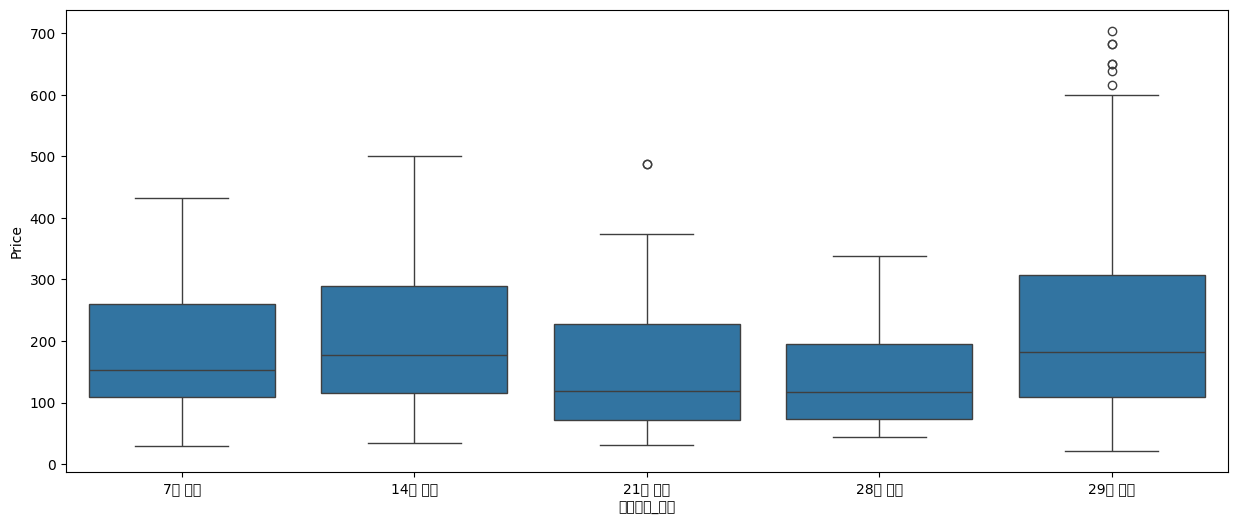

In [480]:
plt.figure(figsize=(15,6))
sns.boxplot(data=reorder_filtered_cleaned, x='구매주기_구간', y='Price')

In [481]:
re_df = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['Customer_unique_id']].count()

/tmp/ipykernel_1559/1356318949.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  re_df = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['Customer_unique_id']].count()


In [482]:
reorder_filtered_cleaned.Customer_unique_id.count() # 370개

354

In [483]:
re_df

,구매주기_구간,Customer_unique_id
0,7일 이내,37
1,14일 이내,25
2,21일 이내,30
3,28일 이내,21
4,29일 이상,241


In [484]:
sample_df["Customer_unique_id"].count()

8387

In [485]:
re_df[re_df.구매주기_구간=="29일 이상"].Customer_unique_id

4    241
Name: Customer_unique_id, dtype: int64

In [486]:
sample_df["Customer_unique_id"].count()

8387

In [487]:
temp_sum = re_df[re_df.구매주기_구간=="29일 이상"]["Customer_unique_id"]+sample_df["Customer_unique_id"].count()

In [488]:
# 위에서 재구매안한고객의 10퍼를 기존의 값과 더한
re_df.loc[(re_df.구매주기_구간=="29일 이상"),"Customer_unique_id" ] = temp_sum

In [489]:
re_df

,구매주기_구간,Customer_unique_id
0,7일 이내,37
1,14일 이내,25
2,21일 이내,30
3,28일 이내,21
4,29일 이상,8628


In [490]:
## 위에서 재구매안한고객의 10퍼를 기존의 값과 더한
re_df2 = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()
re_df2

/tmp/ipykernel_1559/3144882066.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  re_df2 = reorder_filtered_cleaned.groupby(['구매주기_구간'], as_index=False)[['order_count', 'Freight_value', 'Price']].sum()


,구매주기_구간,order_count,Freight_value,Price
0,7일 이내,222,1596.29,6838.84
1,14일 이내,121,1148.54,5520.18
2,21일 이내,197,1695.56,4863.40
3,28일 이내,116,744.44,3055.26
4,29일 이상,1162,12555.87,55768.80


In [491]:
# sample_df
sample_df_order_count_sum = sample_df['order_count'].sum()
sample_df_Freight_value_sum = sample_df['Freight_value'].sum()
sample_df_Price_sum = sample_df['Price'].sum()
print(sample_df_order_count_sum, sample_df_Freight_value_sum, sample_df_Price_sum)

10028 195704.04 1218767.8900000001


In [492]:
## 위에서 재구매안한고객의 10퍼를 기존의 값과 더한
re_df2.loc[(re_df.구매주기_구간=="29일 이상"),"order_count"] = re_df2[re_df2.구매주기_구간=="29일 이상"]["order_count"]+sample_df_order_count_sum

In [493]:
re_df2.loc[(re_df.구매주기_구간=="29일 이상"),"Freight_value"] = re_df2[re_df2.구매주기_구간=="29일 이상"]["Freight_value"]+sample_df_Freight_value_sum

In [494]:
re_df2.loc[(re_df.구매주기_구간=="29일 이상"),"Price"] = re_df2[re_df2.구매주기_구간=="29일 이상"]["Price"]+sample_df_Price_sum

In [495]:
re_df2

,구매주기_구간,order_count,Freight_value,Price
0,7일 이내,222,1596.29,6838.84
1,14일 이내,121,1148.54,5520.18
2,21일 이내,197,1695.56,4863.40
3,28일 이내,116,744.44,3055.26
4,29일 이상,11190,208259.91,1274536.69


In [514]:
re_df3 = pd.merge(re_df, re_df2, on='구매주기_구간', how='inner')
re_df3

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price
0,7일 이내,37,222,1596.29,6838.84
1,14일 이내,25,121,1148.54,5520.18
2,21일 이내,30,197,1695.56,4863.40
3,28일 이내,21,116,744.44,3055.26
4,29일 이상,8628,11190,208259.91,1274536.69


In [515]:
re_df3['Payment_value'] = re_df3['Freight_value'] + re_df3['Price']
re_df3['구매당순이익'] = round(re_df3['Price'] / re_df3['order_count'], 2)
re_df3['구매당운송비'] = round(re_df3['Freight_value'] / re_df3['order_count'], 2)
re_df3['고객당순이익'] = round(re_df3['Price'] / re_df3['Customer_unique_id'], 0)
re_df3['고객당구매수'] = round(re_df3['order_count'] / re_df3['Customer_unique_id'], 2)
re_df3['고객당매출액'] = round(re_df3['Payment_value'] / re_df3['Customer_unique_id'], 0)

In [498]:
# 폰트없어서 안돼
# from matplotlib import font_manager, rc
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
# font_name = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family=font_name)

/tmp/ipykernel_1559/3075114023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구매주기_구간', y='고객당구매수', data=re_df3, palette='muted')
/tmp/ipykernel_1559/3075114023.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구매주기_구간', y='고객당순이익', data=re_df3, palette='muted')
/tmp/ipykernel_1559/3075114023.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구매주기_구간', y='고객당매출액', data=re_df3, palette='muted')
/tmp/ipykernel_1559/3075114023.py:25: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layo

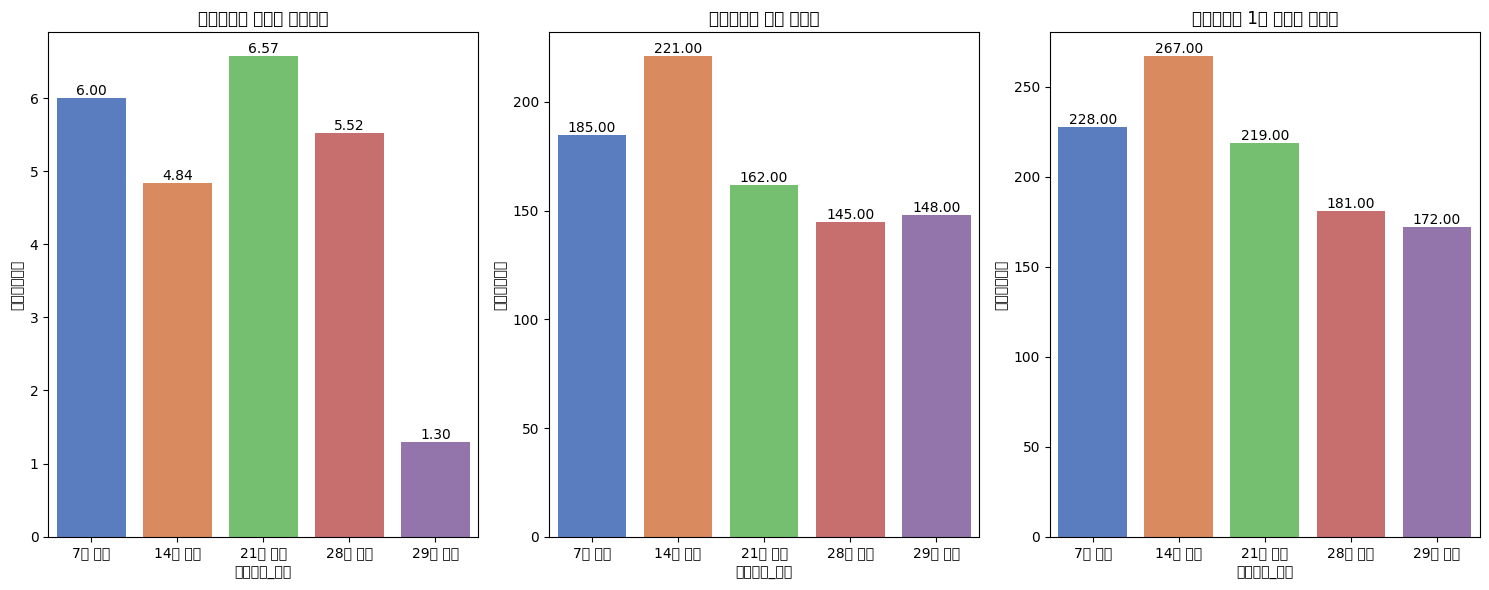

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 3, figsize=(15,6))

plt.subplot(1, 3, 1)
sns.barplot(x='구매주기_구간', y='고객당구매수', data=re_df3, palette='muted')
plt.title('구매주기별 고객당 구매횟수')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 2)
sns.barplot(x='구매주기_구간', y='고객당순이익', data=re_df3, palette='muted')
plt.title('구매주기별 인당 순수익')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 3)
sns.barplot(x='구매주기_구간', y='고객당매출액', data=re_df3, palette='muted')
plt.title('구매주기별 1회 구매당 매출액')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [500]:
re_df3.sort_values(by='고객당순이익', ascending=False)

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
1,14일 이내,25,121,1148.54,5520.18,6668.72,45.62,9.49,221.0,4.84,267.0
0,7일 이내,37,222,1596.29,6838.84,8435.13,30.81,7.19,185.0,6.00,228.0
2,21일 이내,30,197,1695.56,4863.40,6558.96,24.69,8.61,162.0,6.57,219.0
4,29일 이상,8628,11190,208259.91,1274536.69,1482796.60,113.90,18.61,148.0,1.30,172.0
3,28일 이내,21,116,744.44,3055.26,3799.70,26.34,6.42,145.0,5.52,181.0


In [501]:
reorder_yn

,재구매여부,order_count,Freight_value,Price,Customer_unique_id,재구매여부_ratio,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,N,98930,1927758.38,11885798.71,83872,0.929917,13813557.09,120.14,19.49,142.0,1.18,165.0
1,Y,17482,140656.73,653055.06,6321,0.070083,793711.79,37.36,8.05,103.0,2.77,126.0


In [502]:
reorder_filtered

,Customer_unique_id,order_count,Freight_value,Price,재구매여부,구매주기,구매주기_구간
212,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0,29일 이상
213,CUSTOMER_Unique_00188,4,26.87,118.90,Y,28.0,29일 이상
255,CUSTOMER_Unique_00227,4,22.76,109.90,Y,5.5,7일 이내
465,CUSTOMER_Unique_00414,3,47.23,105.50,Y,32.0,29일 이상
528,CUSTOMER_Unique_00470,5,99.25,578.32,Y,207.0,29일 이상
...,...,...,...,...,...,...,...
81464,CUSTOMER_Unique_76745,3,22.49,74.70,Y,41.0,29일 이상
82186,CUSTOMER_Unique_77444,3,34.90,126.46,Y,176.0,29일 이상
84376,CUSTOMER_Unique_79562,4,23.19,330.32,Y,20.0,21일 이내
86891,CUSTOMER_Unique_82027,4,22.90,163.90,Y,120.0,29일 이상


In [503]:
# plt.figure(figsize=(15,6))
# sns.boxplot(data = reorder_filtered_cleaned, x="구매주기_구간", y="Price")
# # 이상치가 존재한다.

In [504]:
re_df3.corr(numeric_only=True).style.background_gradient(cmap='coolwarm', axis=None)

,Customer_unique_id,order_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
Customer_unique_id,1.000000,0.999968,0.999996,0.999999,0.999999,0.975583,0.970060,-0.428879,-0.952023,-0.603226
order_count,0.999968,1.000000,0.999982,0.999968,0.999971,0.974745,0.969855,-0.429757,-0.950005,-0.603163
Freight_value,0.999996,0.999982,1.000000,0.999996,0.999997,0.975466,0.970403,-0.428501,-0.951412,-0.602390
Price,0.999999,0.999968,0.999996,1.000000,1.000000,0.975826,0.970255,-0.427734,-0.952210,-0.602251
Payment_value,0.999999,0.999971,0.999997,1.000000,1.000000,0.975776,0.970277,-0.427842,-0.952098,-0.602270
구매당순이익,0.975583,0.974745,0.975466,0.975826,0.975776,1.000000,0.981110,-0.232846,-0.984627,-0.439623
구매당운송비,0.970060,0.969855,0.970403,0.970255,0.970277,0.981110,1.000000,-0.253894,-0.940831,-0.419147
고객당순이익,-0.428879,-0.429757,-0.428501,-0.427734,-0.427842,-0.232846,-0.253894,1.000000,0.245259,0.957324
고객당구매수,-0.952023,-0.950005,-0.951412,-0.952210,-0.952098,-0.984627,-0.940831,0.245259,1.000000,0.473414
고객당매출액,-0.603226,-0.603163,-0.602390,-0.602251,-0.602270,-0.439623,-0.419147,0.957324,0.473414,1.000000


In [505]:
re_df3

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액
0,7일 이내,37,222,1596.29,6838.84,8435.13,30.81,7.19,185.0,6.00,228.0
1,14일 이내,25,121,1148.54,5520.18,6668.72,45.62,9.49,221.0,4.84,267.0
2,21일 이내,30,197,1695.56,4863.40,6558.96,24.69,8.61,162.0,6.57,219.0
3,28일 이내,21,116,744.44,3055.26,3799.70,26.34,6.42,145.0,5.52,181.0
4,29일 이상,8628,11190,208259.91,1274536.69,1482796.60,113.90,18.61,148.0,1.30,172.0


In [506]:
# 구매주기_구간 인코딩
dummy_df = pd.get_dummies(re_df3['구매주기_구간'], prefix='구매주기_구간')

In [507]:
merged_df = pd.concat([re_df3, dummy_df], axis=1)

In [508]:
merged_df.columns

Index(['구매주기_구간', 'Customer_unique_id', 'order_count', 'Freight_value',
       'Price', 'Payment_value', '구매당순이익', '구매당운송비', '고객당순이익', '고객당구매수',
       '고객당매출액', '구매주기_구간_7일 이내', '구매주기_구간_14일 이내', '구매주기_구간_21일 이내',
       '구매주기_구간_28일 이내', '구매주기_구간_29일 이상'],
      dtype='object')

In [509]:
merged_drop_df = merged_df.drop(["구매주기_구간"],axis=1)

In [510]:
correlation_matrix = merged_drop_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm', axis=None)

In [511]:
correlation_matrix

,Customer_unique_id,order_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액,구매주기_구간_7일 이내,구매주기_구간_14일 이내,구매주기_구간_21일 이내,구매주기_구간_28일 이내,구매주기_구간_29일 이상
Customer_unique_id,1.000000,0.999968,0.999996,0.999999,0.999999,0.975583,0.970060,-0.428879,-0.952023,-0.603226,-0.248728,-0.250472,-0.249745,-0.251054,0.999999
order_count,0.999968,1.000000,0.999982,0.999968,0.999971,0.974745,0.969855,-0.429757,-0.950005,-0.603163,-0.243414,-0.254864,-0.246248,-0.255430,0.999956
Freight_value,0.999996,0.999982,1.000000,0.999996,0.999997,0.975466,0.970403,-0.428501,-0.951412,-0.602390,-0.248186,-0.250890,-0.247586,-0.253330,0.999992
Price,0.999999,0.999968,0.999996,1.000000,1.000000,0.975826,0.970255,-0.427734,-0.952210,-0.602251,-0.248257,-0.249555,-0.250202,-0.251983,0.999997
Payment_value,0.999999,0.999971,0.999997,1.000000,1.000000,0.975776,0.970277,-0.427842,-0.952098,-0.602270,-0.248247,-0.249743,-0.249836,-0.252172,0.999997
구매당순이익,0.975583,0.974745,0.975466,0.975826,0.975776,1.000000,0.981110,-0.232846,-0.984627,-0.439623,-0.259591,-0.039425,-0.350572,-0.326043,0.975630
구매당운송비,0.970060,0.969855,0.970403,0.970255,0.970277,0.981110,1.000000,-0.253894,-0.940831,-0.419147,-0.326227,-0.065155,-0.165043,-0.413629,0.970053
고객당순이익,-0.428879,-0.429757,-0.428501,-0.427734,-0.427842,-0.232846,-0.253894,1.000000,0.245259,0.957324,0.226990,0.865401,-0.180883,-0.482354,-0.429154
고객당구매수,-0.952023,-0.950005,-0.951412,-0.952210,-0.952098,-0.984627,-0.940831,0.245259,1.000000,0.473414,0.309908,-0.001611,0.462982,0.181003,-0.952282
고객당매출액,-0.603226,-0.603163,-0.602390,-0.602251,-0.602270,-0.439623,-0.419147,0.957324,0.473414,1.000000,0.212851,0.781424,0.081641,-0.472353,-0.603563


In [512]:
merged_df

,구매주기_구간,Customer_unique_id,order_count,Freight_value,Price,Payment_value,구매당순이익,구매당운송비,고객당순이익,고객당구매수,고객당매출액,구매주기_구간_7일 이내,구매주기_구간_14일 이내,구매주기_구간_21일 이내,구매주기_구간_28일 이내,구매주기_구간_29일 이상
0,7일 이내,37,222,1596.29,6838.84,8435.13,30.81,7.19,185.0,6.00,228.0,True,False,False,False,False
1,14일 이내,25,121,1148.54,5520.18,6668.72,45.62,9.49,221.0,4.84,267.0,False,True,False,False,False
2,21일 이내,30,197,1695.56,4863.40,6558.96,24.69,8.61,162.0,6.57,219.0,False,False,True,False,False
3,28일 이내,21,116,744.44,3055.26,3799.70,26.34,6.42,145.0,5.52,181.0,False,False,False,True,False
4,29일 이상,8628,11190,208259.91,1274536.69,1482796.60,113.90,18.61,148.0,1.30,172.0,False,False,False,False,True


In [513]:
import pickle

with open("./dacon_term2.pkl", "wb") as file:
    pickle.dump(re_df3, file)